In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import csv
import codecs

filename = "/content/drive/MyDrive/말감3팀/[03팀] 김가경, 김수민, 민채원/code/Gwangjingu_parking_total.csv"

with codecs.open(filename, 'r', 'euc_kr', errors='ignore') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

FileNotFoundError: ignored

In [ ]:
import pandas as pd

df = pd.read_csv(filename, encoding='cp949')
df

,단속일시,단속원금,단속동,단속장소,위반내용,견인지시,데이터기준일자
0,2015-01-01 06:44,40000,화양동,119-4,주정차금지,견인처리,2022-06-10
1,2015-01-01 07:01,40000,화양동,건대입구1번출구앞,32조내지 34조위반,미견인,2022-06-10
2,2015-01-01 07:24,50000,구의동,동서울터미널 주차장앞,32조내지 34조위반,미견인,2022-06-10
3,2015-01-01 08:00,40000,화양동,건대입구1번출구앞,32조내지 34조위반,미견인,2022-06-10
4,2015-01-01 08:15,40000,화양동,건대입구1번출구앞,32조내지 34조위반,미견인,2022-06-10
...,...,...,...,...,...,...,...
490926,2023-02-28 20:43:00,32000,군자동,군자빌딩,주정차금지(황색실선)구역,미견인,NaN
490927,2023-02-28 21:23:00,8000,자양동,서울 광진구 자양동 659-32,보도,미견인,NaN
490928,2023-02-28 21:38:00,32000,화양동,서울 광진구 능동로 154,보도,미견인,NaN
490929,2023-02-28 22:36:00,32000,자양동,서울 광진구 자양동 12-10,교차로,미견인,NaN


In [ ]:
# 단속동에 있는 데이터 중복없이 보여줌
unique_dongs = df['단속동'].drop_duplicates()
print(unique_dongs)

0              화양동
2              구의동
15              능동
24             중곡동
35             자양동
            ...   
339405      동일로64길
339543      능동로43길
345432     광나루로48길
351007     용마산로8다길
352422    천호대로132길
Name: 단속동, Length: 491, dtype: object


In [ ]:
df = df[df['단속동'].isin(['중곡동', '구의동', '광장동', '자양동', '군자동', '화양동', '능동'])]
df

,단속일시,단속원금,단속동,단속장소,위반내용,견인지시,데이터기준일자
0,2015-01-01 06:44,40000,화양동,119-4,주정차금지,견인처리,2022-06-10
1,2015-01-01 07:01,40000,화양동,건대입구1번출구앞,32조내지 34조위반,미견인,2022-06-10
2,2015-01-01 07:24,50000,구의동,동서울터미널 주차장앞,32조내지 34조위반,미견인,2022-06-10
3,2015-01-01 08:00,40000,화양동,건대입구1번출구앞,32조내지 34조위반,미견인,2022-06-10
4,2015-01-01 08:15,40000,화양동,건대입구1번출구앞,32조내지 34조위반,미견인,2022-06-10
...,...,...,...,...,...,...,...
490926,2023-02-28 20:43:00,32000,군자동,군자빌딩,주정차금지(황색실선)구역,미견인,NaN
490927,2023-02-28 21:23:00,8000,자양동,서울 광진구 자양동 659-32,보도,미견인,NaN
490928,2023-02-28 21:38:00,32000,화양동,서울 광진구 능동로 154,보도,미견인,NaN
490929,2023-02-28 22:36:00,32000,자양동,서울 광진구 자양동 12-10,교차로,미견인,NaN


In [ ]:
# 군집분석하기 위해 문자열 데이터 => 범주형 데이터로 변경

In [ ]:
df.loc[df['단속동'] == '중곡동', '단속동'] = 1
df.loc[df['단속동'] == '군자동', '단속동'] = 2
df.loc[df['단속동'] == '능동', '단속동'] = 3
df.loc[df['단속동'] == '화양동', '단속동'] = 4
df.loc[df['단속동'] == '구의동', '단속동'] = 5
df.loc[df['단속동'] == '광장동', '단속동'] = 6
df.loc[df['단속동'] == '자양동', '단속동'] = 7

df

,단속일시,단속원금,단속동,단속장소,위반내용,견인지시,데이터기준일자
0,2015-01-01 06:44,40000,4,119-4,주정차금지,견인처리,2022-06-10
1,2015-01-01 07:01,40000,4,건대입구1번출구앞,32조내지 34조위반,미견인,2022-06-10
2,2015-01-01 07:24,50000,5,동서울터미널 주차장앞,32조내지 34조위반,미견인,2022-06-10
3,2015-01-01 08:00,40000,4,건대입구1번출구앞,32조내지 34조위반,미견인,2022-06-10
4,2015-01-01 08:15,40000,4,건대입구1번출구앞,32조내지 34조위반,미견인,2022-06-10
...,...,...,...,...,...,...,...
490926,2023-02-28 20:43:00,32000,2,군자빌딩,주정차금지(황색실선)구역,미견인,NaN
490927,2023-02-28 21:23:00,8000,7,서울 광진구 자양동 659-32,보도,미견인,NaN
490928,2023-02-28 21:38:00,32000,4,서울 광진구 능동로 154,보도,미견인,NaN
490929,2023-02-28 22:36:00,32000,7,서울 광진구 자양동 12-10,교차로,미견인,NaN


In [ ]:
# 단속동의 데이터들을 정수형 타입으로 변경
df['단속동'] = pd.to_numeric(df['단속동'], errors='coerce').astype('Int64')

<ipython-input-7-e777a527ab69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['단속동'] = pd.to_numeric(df['단속동'], errors='coerce').astype('Int64')


In [ ]:
# 단속동별로 단속원금(주정차 현황) 파악

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상
data = df[['단속동', '단속원금']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

In [ ]:
from sklearn.cluster import KMeans

k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df['cluster'] = model.fit_predict(data_scale)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-9-e171a09f8f41>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = model.fit_predict(data_scale)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

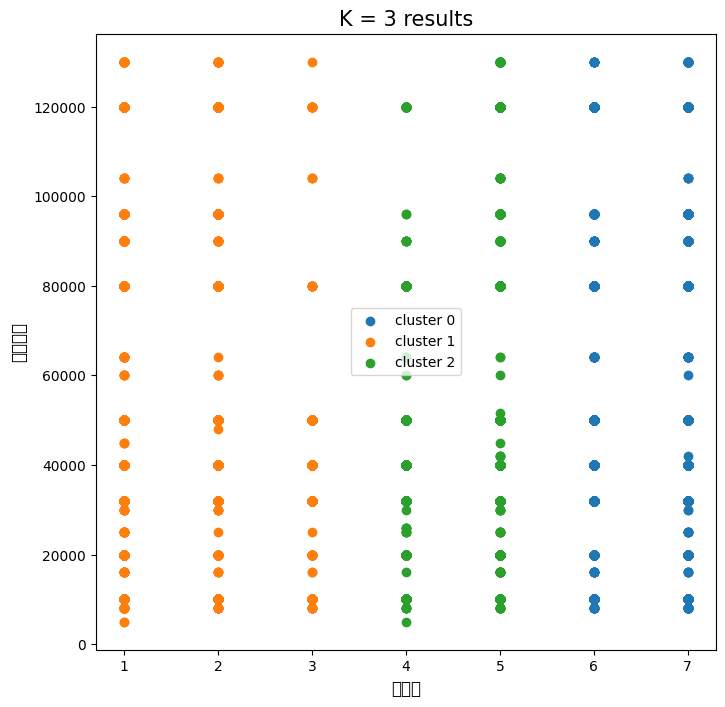

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, '단속동'], df.loc[df['cluster'] == i, '단속원금'],
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('단속동', size = 12)
plt.ylabel('단속원금', size = 12)
plt.show()

In [ ]:
# 필요 패키지 불러오기 (KMeans, matplotlib, preprocessing)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing

# 원본 데이터를 복사해서 전처리하기 (원본 데이터를 가지고 바로 전처리하지 않는다)
processed_data = df.copy()

# 데이터 전처리 - 정규화를 위한 작업
scaler = preprocessing.MinMaxScaler()
processed_data[['단속동', '단속원금']] = scaler.fit_transform(processed_data[['단속동', '단속원금']])

# 화면(figure) 생성
plt.figure(figsize = (10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

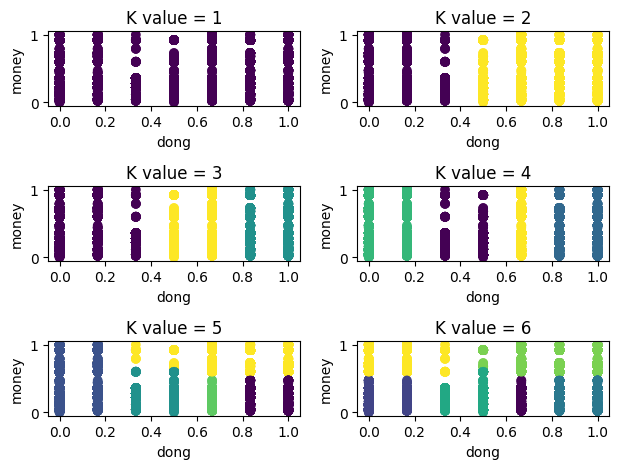

In [ ]:
# K 값을 늘려가며 반복 테스트
for i in range(1, 7):
   # 클러스터 생성
   estimator = KMeans(n_clusters = i)
   ids = estimator.fit_predict(processed_data[['단속동', '단속원금']])
  # 2행 3열을 가진 서브플롯 추가 (인덱스 = i)
   plt.subplot(3, 2, i)
   plt.tight_layout()
  # 서브플롯의 라벨링
   plt.title("K value = {}".format(i))
   plt.xlabel('dong')
   plt.ylabel('money')
  # 클러스터링 그리기
   plt.scatter(processed_data['단속동'], processed_data['단속원금'], c=ids)
plt.show()

In [ ]:
# 광진구 공영주차장 정보 csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import csv
import codecs

filename1 = "/content/drive/MyDrive/말감3팀/[03팀] 김가경, 김수민, 민채원/code/Gwangjin-gu Public Parking lot.csv"

with codecs.open(filename1, 'r', 'euc_kr', errors='ignore') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

['연번', '운영개시일', '동명', '시설명', '위치', '부지면적', '주차면수 소계', '주차면수 노상', '주차면수 노외', '거주자', '공영', '급지', '주차요금 5분당', '주차요금 주간', '주차요금 야간', '주차요금 종일', '시설규모', '비고']
['1', '2010-09', '중곡1동', '중곡제일전통시장 공영', '중곡1동 221-6', '695', '21', '0', '21', '', 'O', '2', '250원', '', '3만원', '', '', '구유지(지역경제과·위탁)']
['2', '1998-03', '중곡2동', '장신구', '중곡2동 133-10', '531', '22', '0', '22', 'O', '', '5', '', '4만원', '3만원', '5만원', '', '시유지']
['3', '1999-06', '중곡2동', '중곡동복개천', '중곡2동 150-196', '', '78', '78', '0', '', 'O', '2', '200원', '', '', '10만원', '', '시유도로(노상·공단위탁)']
['4', '2009-04', '중곡3동', '중곡3동마을공원', '중곡3동 195-1', '3038.3', '162', '', '162', 'O', 'O', '5', '75원 ', '4만원', '3만원', '5만원', '지하2층', '구유지']
['5', '2010-01', '중곡3동', '중곡체육센터', '중곡3동 168-8', '3,690.00', '6', '', '6', 'O', '', '5', '', '4만원', '3만원', '5만원', '', '구유지']
['6', '1996-01', '중곡4동', '신성시장길', '중곡4동 453 일대', '', '33', '33', '', '', 'O', '2', '250원', '', '', '10만원', '', '구유도로(노상·민간위탁)']
['7', '2001-08', '중곡4동', '새오름', '중곡4동 143-70', '137', '7', '', '7',

In [ ]:
import pandas as pd

df1 = pd.read_csv(filename1, encoding='cp949')
df1

,연번,운영개시일,동명,시설명,위치,부지면적,주차면수 소계,주차면수 노상,주차면수 노외,거주자,공영,급지,주차요금 5분당,주차요금 주간,주차요금 야간,주차요금 종일,시설규모,비고
0,1,2010-09,중곡1동,중곡제일전통시장 공영,중곡1동 221-6,695,21,0.0,21.0,NaN,O,2,250원,NaN,3만원,NaN,NaN,구유지(지역경제과·위탁)
1,2,1998-03,중곡2동,장신구,중곡2동 133-10,531,22,0.0,22.0,O,NaN,5,NaN,4만원,3만원,5만원,NaN,시유지
2,3,1999-06,중곡2동,중곡동복개천,중곡2동 150-196,NaN,78,78.0,0.0,NaN,O,2,200원,NaN,NaN,10만원,NaN,시유도로(노상·공단위탁)
3,4,2009-04,중곡3동,중곡3동마을공원,중곡3동 195-1,3038.3,162,NaN,162.0,O,O,5,75원,4만원,3만원,5만원,지하2층,구유지
4,5,2010-01,중곡3동,중곡체육센터,중곡3동 168-8,"3,690.00",6,NaN,6.0,O,NaN,5,NaN,4만원,3만원,5만원,NaN,구유지
5,6,1996-01,중곡4동,신성시장길,중곡4동 453 일대,NaN,33,33.0,NaN,NaN,O,2,250원,NaN,NaN,10만원,NaN,구유도로(노상·민간위탁)
6,7,2001-08,중곡4동,새오름,중곡4동 143-70,137,7,NaN,7.0,O,NaN,5,NaN,4만원,3만원,5만원,NaN,구유지
7,8,2003-04,중곡4동,용마산남,중곡4동 69-2,777.9,25,NaN,25.0,O,NaN,5,NaN,4만원,3만원,5만원,NaN,구유지
8,9,2005-04,중곡4동,긴고랑길공영,중곡4동 72-1 외,"1,653.00",53,NaN,53.0,O,NaN,5,NaN,4만원,3만원,5만원,NaN,구유지
9,10,1998-12,중곡4동,해오름,중곡4동 87-14,462.9,20,NaN,20.0,O,NaN,5,NaN,4만원,3만원,5만원,NaN,시유지


In [ ]:
df1.loc[df1['동명'] == '구의1동', '동명'] = 1
df1.loc[df1['동명'] == '구의2동', '동명'] = 1
df1.loc[df1['동명'] == '구의3동', '동명'] = 1
df1.loc[df1['동명'] == '중곡1동', '동명'] = 2
df1.loc[df1['동명'] == '중곡2동', '동명'] = 2
df1.loc[df1['동명'] == '중곡3동', '동명'] = 2
df1.loc[df1['동명'] == '중곡4동', '동명'] = 2
df1.loc[df1['동명'] == '능동', '동명'] = 3
df1.loc[df1['동명'] == '자양1동', '동명'] = 4
df1.loc[df1['동명'] == '자양2동', '동명'] = 4
df1.loc[df1['동명'] == '자양3동', '동명'] = 4
df1.loc[df1['동명'] == '자양4동', '동명'] = 4
df1.loc[df1['동명'] == '광장동', '동명'] = 5
df1.loc[df1['동명'] == '화양동', '동명'] = 6
df1.loc[df1['동명'] == '군자동', '동명'] = 7

df1

,연번,운영개시일,동명,시설명,위치,부지면적,주차면수 소계,주차면수 노상,주차면수 노외,거주자,공영,급지,주차요금 5분당,주차요금 주간,주차요금 야간,주차요금 종일,시설규모,비고
0,1,2010-09,2,중곡제일전통시장 공영,중곡1동 221-6,695,21,0.0,21.0,NaN,O,2,250원,NaN,3만원,NaN,NaN,구유지(지역경제과·위탁)
1,2,1998-03,2,장신구,중곡2동 133-10,531,22,0.0,22.0,O,NaN,5,NaN,4만원,3만원,5만원,NaN,시유지
2,3,1999-06,2,중곡동복개천,중곡2동 150-196,NaN,78,78.0,0.0,NaN,O,2,200원,NaN,NaN,10만원,NaN,시유도로(노상·공단위탁)
3,4,2009-04,2,중곡3동마을공원,중곡3동 195-1,3038.3,162,NaN,162.0,O,O,5,75원,4만원,3만원,5만원,지하2층,구유지
4,5,2010-01,2,중곡체육센터,중곡3동 168-8,"3,690.00",6,NaN,6.0,O,NaN,5,NaN,4만원,3만원,5만원,NaN,구유지
5,6,1996-01,2,신성시장길,중곡4동 453 일대,NaN,33,33.0,NaN,NaN,O,2,250원,NaN,NaN,10만원,NaN,구유도로(노상·민간위탁)
6,7,2001-08,2,새오름,중곡4동 143-70,137,7,NaN,7.0,O,NaN,5,NaN,4만원,3만원,5만원,NaN,구유지
7,8,2003-04,2,용마산남,중곡4동 69-2,777.9,25,NaN,25.0,O,NaN,5,NaN,4만원,3만원,5만원,NaN,구유지
8,9,2005-04,2,긴고랑길공영,중곡4동 72-1 외,"1,653.00",53,NaN,53.0,O,NaN,5,NaN,4만원,3만원,5만원,NaN,구유지
9,10,1998-12,2,해오름,중곡4동 87-14,462.9,20,NaN,20.0,O,NaN,5,NaN,4만원,3만원,5만원,NaN,시유지


In [ ]:
# 단속동의 데이터들을 정수형 타입으로 변경
df1['동명'] = pd.to_numeric(df1['동명'], errors='coerce').astype('Int64')

In [ ]:
# 광진구 동별로 공영주차장 개수 파악

In [ ]:
# 필요 패키지 불러오기 (KMeans, matplotlib, preprocessing)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing

# 원본 데이터를 복사해서 전처리하기 (원본 데이터를 가지고 바로 전처리하지 않는다)
processed_data = df1.copy()

# 데이터 전처리 - 정규화를 위한 작업
scaler = preprocessing.MinMaxScaler()
processed_data[['동명', '주차면수 소계']] = scaler.fit_transform(processed_data[['동명', '주차면수 소계']])

# 화면(figure) 생성
plt.figure(figsize = (10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

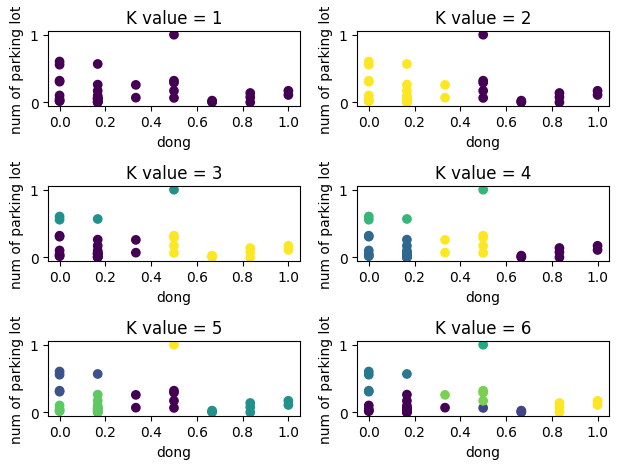

In [ ]:
# K 값을 늘려가며 반복 테스트
for i in range(1, 7):
   # 클러스터 생성
   estimator = KMeans(n_clusters = i)
   ids = estimator.fit_predict(processed_data[['동명', '주차면수 소계']])
  # 2행 3열을 가진 서브플롯 추가 (인덱스 = i)
   plt.subplot(3, 2, i)
   plt.tight_layout()
  # 서브플롯의 라벨링
   plt.title("K value = {}".format(i))
   plt.xlabel('dong')
   plt.ylabel('num of parking lot')
  # 클러스터링 그리기
   plt.scatter(processed_data['동명'], processed_data['주차면수 소계'], c=ids)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상
data = df1[['동명', '주차면수 소계']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

In [ ]:
from sklearn.cluster import KMeans

k = 4

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df1['cluster'] = model.fit_predict(data_scale)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


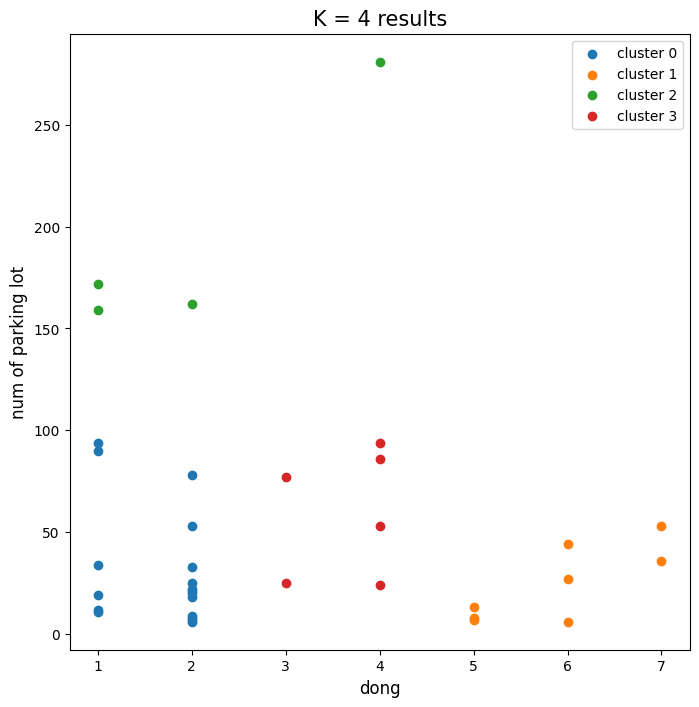

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df1.loc[df1['cluster'] == i, '동명'], df1.loc[df1['cluster'] == i, '주차면수 소계'],
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('dong', size = 12)
plt.ylabel('num of parking lot', size = 12)
plt.show()

In [ ]:
# 3월 광진구 인구 수 csv

In [ ]:
import csv
import codecs

filename2 = "/content/drive/MyDrive/말감3팀/[03팀] 김가경, 김수민, 민채원/code/Gwangjin-Gu Population of March.csv"

with codecs.open(filename2, 'r', 'euc_kr', errors='ignore') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

FileNotFoundError: ignored

In [ ]:
import pandas as pd

df2 = pd.read_csv(filename2, encoding='cp949')
df2

,행정기관,합계,남,여
0,광진구,"336,801","162,209","174,592"
1,화양동,"23,450","11,171","12,279"
2,군자동,"19,340","9,576","9,764"
3,중곡제1동,"15,453","7,364","8,089"
4,중곡제2동,"20,856","9,828","11,028"
5,중곡제3동,"15,913","7,861","8,052"
6,중곡제4동,"27,866","13,623","14,243"
7,능동,"11,163","5,131","6,032"
8,광장동,"34,044","16,468","17,576"
9,자양제1동,"22,007","10,710","11,297"


In [ ]:
df2 = df2.drop(df2[df2['행정기관'] == '광진구'].index)
df2.loc[df2['행정기관'] == '구의제1동', '행정기관'] = 1
df2.loc[df2['행정기관'] == '구의제2동', '행정기관'] = 1
df2.loc[df2['행정기관'] == '구의제3동', '행정기관'] = 1
df2.loc[df2['행정기관'] == '자양제1동', '행정기관'] = 2
df2.loc[df2['행정기관'] == '자양제2동', '행정기관'] = 2
df2.loc[df2['행정기관'] == '자양제3동', '행정기관'] = 2
df2.loc[df2['행정기관'] == '자양제4동', '행정기관'] = 2
df2.loc[df2['행정기관'] == '중곡제1동', '행정기관'] = 3
df2.loc[df2['행정기관'] == '중곡제2동', '행정기관'] = 3
df2.loc[df2['행정기관'] == '중곡제3동', '행정기관'] = 3
df2.loc[df2['행정기관'] == '중곡제4동', '행정기관'] = 3
df2.loc[df2['행정기관'] == '화양동', '행정기관'] = 4
df2.loc[df2['행정기관'] == '군자동', '행정기관'] = 5
df2.loc[df2['행정기관'] == '능동', '행정기관'] = 6
df2.loc[df2['행정기관'] == '광장동', '행정기관'] = 7

df2

,행정기관,합계,남,여
1,4,"23,450","11,171","12,279"
2,5,"19,340","9,576","9,764"
3,3,"15,453","7,364","8,089"
4,3,"20,856","9,828","11,028"
5,3,"15,913","7,861","8,052"
6,3,"27,866","13,623","14,243"
7,6,"11,163","5,131","6,032"
8,7,"34,044","16,468","17,576"
9,2,"22,007","10,710","11,297"
10,2,"23,802","11,546","12,256"


In [ ]:
# 단속동의 데이터들을 정수형 타입으로 변경
df2['행정기관'] = pd.to_numeric(df2['행정기관'], errors='coerce').astype('Int64')

In [ ]:
# 컬럼명이 합계인 데이터들의 데이터 타입 정수형으로 변환(쉼표제거 숫자만을 포함하는 문자열 -> 정수형)
df2['합계'] = df2['합계'].str.replace(',', '').astype(int)

In [ ]:
# 광진구 동별로 인구수가 얼만큼 분포되었는지 확인

In [ ]:
# 필요 패키지 불러오기 (KMeans, matplotlib, preprocessing)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing

# 원본 데이터를 복사해서 전처리하기 (원본 데이터를 가지고 바로 전처리하지 않는다)
processed_data = df2.copy()

# 데이터 전처리 - 정규화를 위한 작업
scaler = preprocessing.MinMaxScaler()
processed_data[['행정기관', '합계']] = scaler.fit_transform(processed_data[['행정기관', '합계']])

# 화면(figure) 생성
plt.figure(figsize = (10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

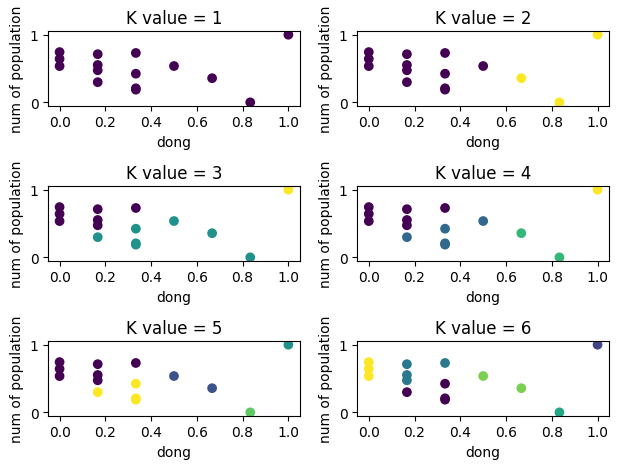

In [ ]:
# K 값을 늘려가며 반복 테스트
for i in range(1, 7):
   # 클러스터 생성
   estimator = KMeans(n_clusters = i)
   ids = estimator.fit_predict(processed_data[['행정기관', '합계']])
  # 2행 3열을 가진 서브플롯 추가 (인덱스 = i)
   plt.subplot(3, 2, i)
   plt.tight_layout()
  # 서브플롯의 라벨링
   plt.title("K value = {}".format(i))
   plt.xlabel('dong')
   plt.ylabel('num of population')
  # 클러스터링 그리기
   plt.scatter(processed_data['행정기관'], processed_data['합계'], c=ids)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상
data = df2[['행정기관', '합계']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

In [ ]:
from sklearn.cluster import KMeans

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df2['cluster'] = model.fit_predict(data_scale)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


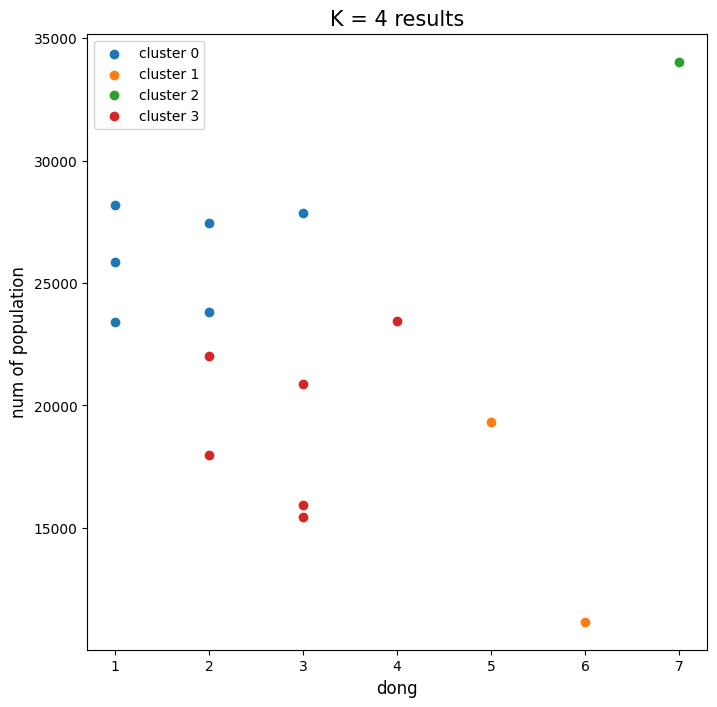

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df2.loc[df2['cluster'] == i, '행정기관'], df2.loc[df2['cluster'] == i, '합계'],
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('dong', size = 12)
plt.ylabel('num of population', size = 12)
plt.show()